In [1]:
import numpy
import qubit_matmul
from matplotlib import pyplot
from scipy.stats import unitary_group
from scipy.linalg import block_diag

In [2]:
def kron(*args):
    acc = args[0]
    for a in args[1:]:
        acc = numpy.kron(acc, a)
    return acc

In [3]:
acc = numpy.zeros((256,256), dtype=numpy.complex128)
for i in range(10000):
    u1 = numpy.exp(2.0j * numpy.pi * numpy.random.rand())
    u23 = unitary_group.rvs(2)
    u4 = numpy.exp(2.0j * numpy.pi * numpy.random.rand())
    u = block_diag(u1, u23, u4)
    acc += kron(u, u, numpy.conjugate(u.T), numpy.conjugate(u.T))
acc /= 10000

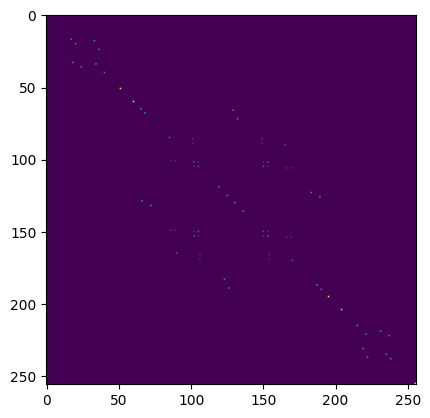

In [4]:
pyplot.imshow(abs(acc))

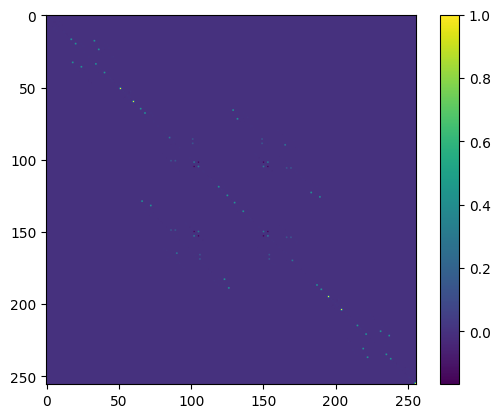

In [5]:
newacc = acc.copy()
newacc[abs(newacc) < 1e-3] = 0
newacc = newacc.real
pyplot.imshow(newacc)
pyplot.colorbar()